# Type 1 Importing

In [1]:
import requests
import pandas as pd


API_KEY = '5FKB5XKDKRZ2K0RY'
symbol = 'AAPL'  # Stock symbol (e.g., Apple Inc.)

                                                                       # Construct the API request URL
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={API_KEY}'


response = requests.get(url)
data = response.json()

                                                                       # Convert JSON response to a pandas DataFrame
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)

print(df.head())


             1. open   2. high    3. low  4. close 5. volume
2024-04-22  165.5000  167.2600  164.7700  165.8400  47934094
2024-04-19  166.2100  166.4000  164.0750  165.0000  68149377
2024-04-18  168.0300  168.6400  166.5500  167.0400  43122903
2024-04-17  169.6100  170.6500  168.0000  168.0000  50901210
2024-04-16  171.7500  173.7600  168.2700  169.3800  73711235


In [2]:
df.shape

(100, 5)

In [3]:
df.reset_index(inplace = True)

In [4]:
df.shape

(100, 6)

In [5]:
df.rename(columns = {'index':'Date'})

,Date,1. open,2. high,3. low,4. close,5. volume
0,2024-04-22,165.5000,167.2600,164.7700,165.8400,47934094
1,2024-04-19,166.2100,166.4000,164.0750,165.0000,68149377
2,2024-04-18,168.0300,168.6400,166.5500,167.0400,43122903
3,2024-04-17,169.6100,170.6500,168.0000,168.0000,50901210
4,2024-04-16,171.7500,173.7600,168.2700,169.3800,73711235
...,...,...,...,...,...,...
95,2023-12-04,189.9800,190.0500,187.4511,189.4300,43389519
96,2023-12-01,190.3300,191.5600,189.2300,191.2400,45704823
97,2023-11-30,189.8400,190.3200,188.1900,189.9500,48794366
98,2023-11-29,190.9000,192.0900,188.9700,189.3700,43014224


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      100 non-null    datetime64[ns]
 1   1. open    100 non-null    object        
 2   2. high    100 non-null    object        
 3   3. low     100 non-null    object        
 4   4. close   100 non-null    object        
 5   5. volume  100 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.8+ KB


# Type 2 Importing data with automation

In [1]:
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

API_KEY = '5FKB5XKDKRZ2K0RY'


In [2]:
                                                                  # List of stock symbols or currency pairs
symbols_stocks = ['AAPL', 'MSFT', 'GOOGL']
symbols_fx = ['EURUSD', 'USDJPY', 'GBPUSD']

                                                                  # Initialize API clients
ts = TimeSeries(key=API_KEY, output_format='pandas')
fx = ForeignExchange(key=API_KEY, output_format='pandas')


In [3]:
stock_data = {}
for symbol in symbols_stocks:
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='compact')
    stock_data[symbol] = data

                                                                # Combine data for all stocks into a single DataFrame
df_stocks = pd.concat(stock_data.values(), keys=stock_data.keys())


In [4]:
fx_data = {}
for symbol in symbols_fx:
    data, meta_data = fx.get_currency_exchange_daily(from_symbol=symbol[:3], to_symbol=symbol[3:], outputsize='compact')
    fx_data[symbol] = data

                                                               # Combine data for all currency pairs into a single DataFrame
df_fx = pd.concat(fx_data.values(), keys=fx_data.keys())


In [5]:
print("Stock Data:")
print(df_stocks.head())

print("\nCurrency Exchange Data:")
print(df_fx.head())


df_stocks.to_csv('stock_data.csv')
df_fx.to_csv('fx_data.csv')


Stock Data:
                 1. open  2. high   3. low  4. close   5. volume
     date                                                       
AAPL 2024-04-23  165.260   167.05  164.930    166.90  49298369.0
     2024-04-22  165.515   167.26  164.770    165.84  48116443.0
     2024-04-19  166.210   166.40  164.075    165.00  68149377.0
     2024-04-18  168.030   168.64  166.550    167.04  43122903.0
     2024-04-17  169.610   170.65  168.000    168.00  50901210.0

Currency Exchange Data:
                   1. open  2. high   3. low  4. close
       date                                           
EURUSD 2024-04-23  1.06543  1.07113  1.06380   1.07007
       2024-04-22  1.06556  1.06706  1.06237   1.06513
       2024-04-19  1.06431  1.06776  1.06102   1.06526
       2024-04-18  1.06715  1.06900  1.06410   1.06435
       2024-04-17  1.06164  1.06796  1.06059   1.06709


In [6]:
df_stocks1 = df_stocks.reset_index().rename(columns = {'level_0': 'symbol'})
df_fx1 = df_fx.reset_index().rename(columns = {'level_0':'currencyPair'})

In [7]:
df_stocks1.head()

,symbol,date,1. open,2. high,3. low,4. close,5. volume
0,AAPL,2024-04-23,165.260,167.05,164.930,166.90,49298369.0
1,AAPL,2024-04-22,165.515,167.26,164.770,165.84,48116443.0
2,AAPL,2024-04-19,166.210,166.40,164.075,165.00,68149377.0
3,AAPL,2024-04-18,168.030,168.64,166.550,167.04,43122903.0
4,AAPL,2024-04-17,169.610,170.65,168.000,168.00,50901210.0


In [8]:
df_fx1.head()

,currencyPair,date,1. open,2. high,3. low,4. close
0,EURUSD,2024-04-23,1.06543,1.07113,1.06380,1.07007
1,EURUSD,2024-04-22,1.06556,1.06706,1.06237,1.06513
2,EURUSD,2024-04-19,1.06431,1.06776,1.06102,1.06526
3,EURUSD,2024-04-18,1.06715,1.06900,1.06410,1.06435
4,EURUSD,2024-04-17,1.06164,1.06796,1.06059,1.06709


In [9]:
df_stocks1['date'] = pd.to_datetime(df_stocks1['date'])
df_fx1['date'] = pd.to_datetime(df_fx1['date'])

In [10]:
# Calculate daily returns
df_stocks1['daily_return'] = df_stocks1['4. close'].pct_change() * 100
df_stocks1['daily_return']

0           NaN
1     -0.635111
2     -0.506512
3      1.236364
4      0.574713
         ...   
295    0.746039
296   -1.313077
297    2.003558
298    0.508115
299    1.856184
Name: daily_return, Length: 300, dtype: float64

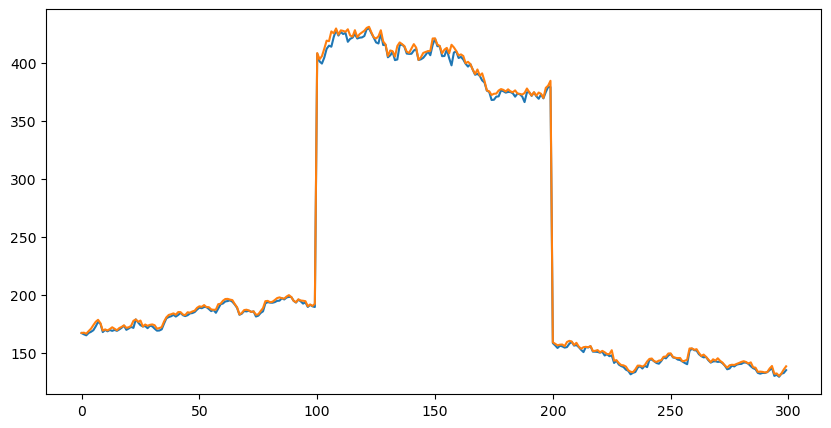

In [11]:
plt.figure(figsize = (10,5))
plt.plot(df_stocks1['4. close'])
plt.plot(df_stocks1['2. high'])

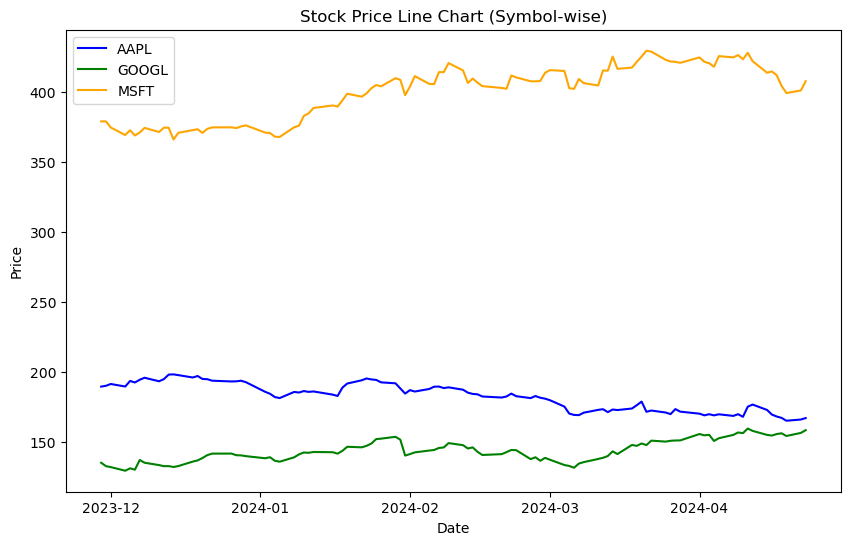

In [12]:
grouped_df = df_stocks1.groupby(['symbol', 'date']).agg({'4. close': 'mean'}).reset_index()
plt.figure(figsize=(10, 6))

symbols = grouped_df['symbol'].unique()
colors = ['blue', 'green', 'orange']                                           # You can add more colors if needed

for i, symbol in enumerate(symbols):
    symbol_data = grouped_df[grouped_df['symbol'] == symbol]
    plt.plot(symbol_data['date'], symbol_data['4. close'], label=symbol, color=colors[i % len(colors)])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Line Chart (Symbol-wise)')
plt.legend()
plt.show()

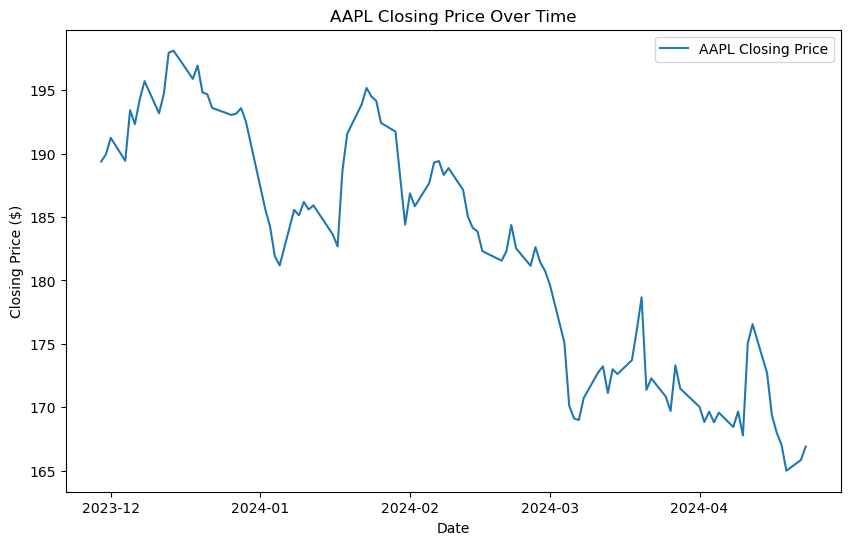

In [13]:
aapl_data = df_stocks1[df_stocks1['symbol'] == 'AAPL']
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['date'], aapl_data['4. close'], label='AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('AAPL Closing Price Over Time')
plt.legend()
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_7896\174738610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['Daily Change'] = aapl_data['4. close'].diff()


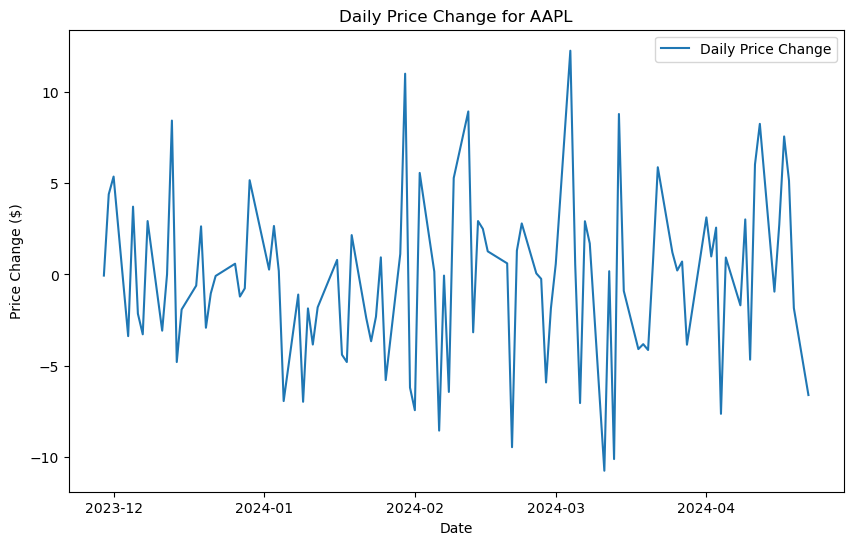

In [26]:
                                                        # Volatility Analysis - Calculate daily price changes for AAPL
aapl_data['Daily Change'] = aapl_data['4. close'].diff()
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['date'], aapl_data['Daily Change'], label='Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change ($)')
plt.title('Daily Price Change for AAPL')
plt.legend()
plt.show()

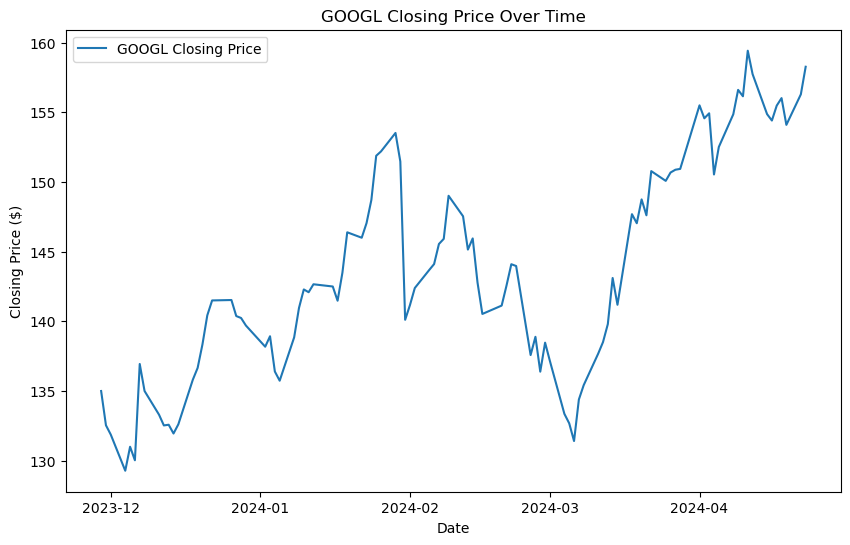

In [21]:
googl_data = df_stocks1[df_stocks1['symbol'] == 'GOOGL']
plt.figure(figsize=(10, 6))
plt.plot(googl_data['date'], googl_data['4. close'], label='GOOGL Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('GOOGL Closing Price Over Time')
plt.legend()
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_7896\809273610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googl_data['Daily Change'] = googl_data['4. close'].diff()


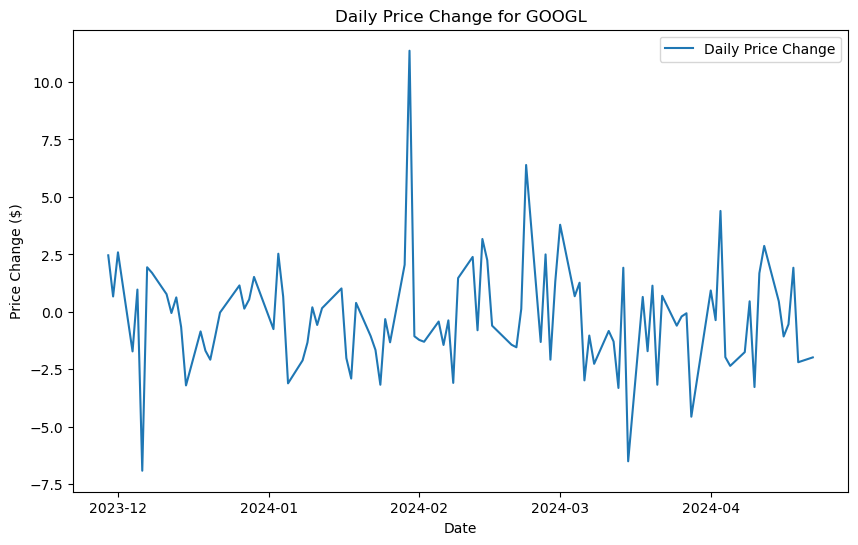

In [27]:
                                                        # Volatility Analysis - Calculate daily price changes for GOOGL
googl_data['Daily Change'] = googl_data['4. close'].diff()
plt.figure(figsize=(10, 6))
plt.plot(googl_data['date'], googl_data['Daily Change'], label='Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change ($)')
plt.title('Daily Price Change for GOOGL')
plt.legend()
plt.show()

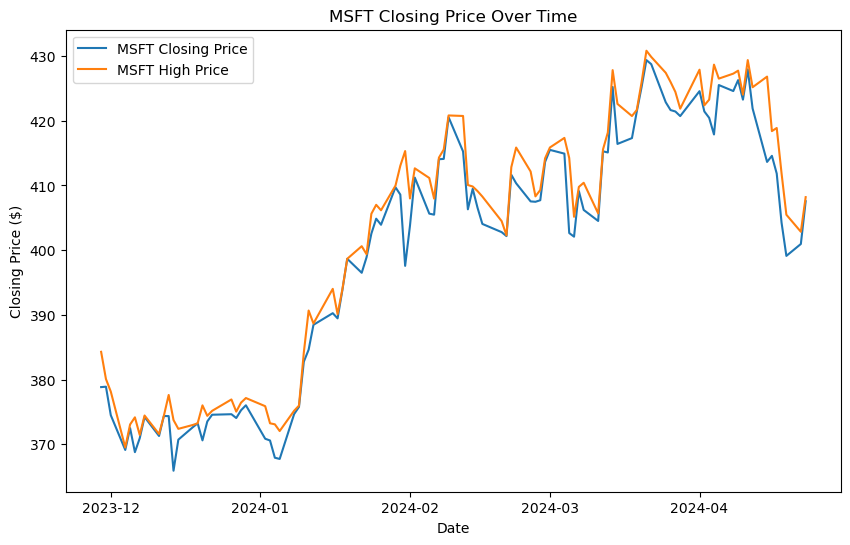

In [22]:
msft_data = df_stocks1[df_stocks1['symbol'] == 'MSFT']
plt.figure(figsize=(10, 6))
plt.plot(msft_data['date'], msft_data['4. close'], label='MSFT Closing Price')
plt.plot(msft_data['date'], msft_data['2. high'], label = 'MSFT High Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('MSFT Closing Price Over Time')
plt.legend()
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_7896\3934742966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_data['Daily Change'] = msft_data['4. close'].diff()


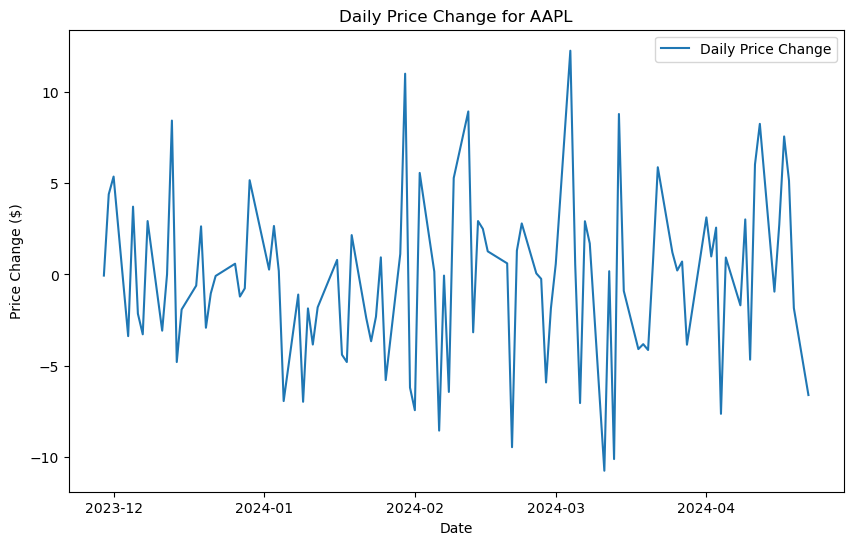

In [28]:
                                                        # Volatility Analysis - Calculate daily price changes for MSFT
msft_data['Daily Change'] = msft_data['4. close'].diff()
plt.figure(figsize=(10, 6))
plt.plot(msft_data['date'], msft_data['Daily Change'], label='Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change ($)')
plt.title('Daily Price Change for AAPL')
plt.legend()
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_7896\957301225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['50-day MA'] = aapl_data['4. close'].rolling(window=50).mean()


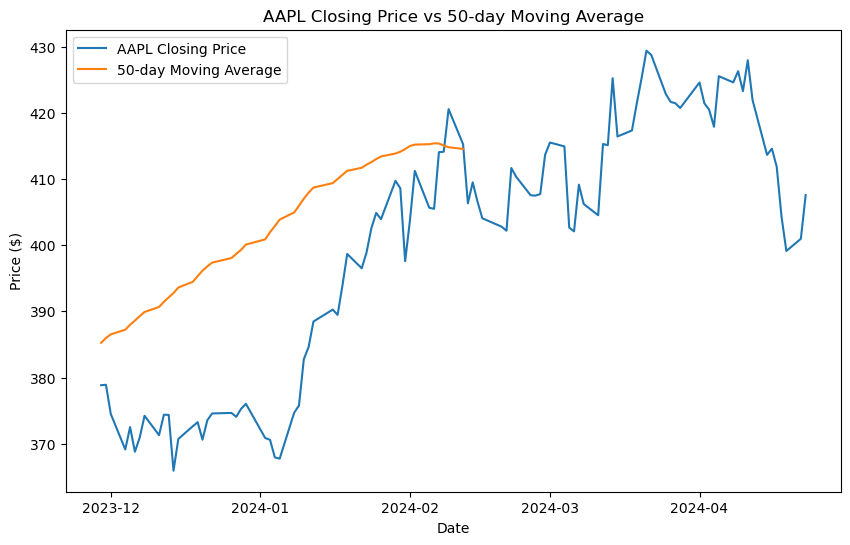

In [20]:
aapl_data['50-day MA'] = aapl_data['4. close'].rolling(window=50).mean()
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['date'], aapl_data['4. close'], label='AAPL Closing Price')
plt.plot(aapl_data['date'], aapl_data['50-day MA'], label='50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('AAPL Closing Price vs 50-day Moving Average')
plt.legend()
plt.show()

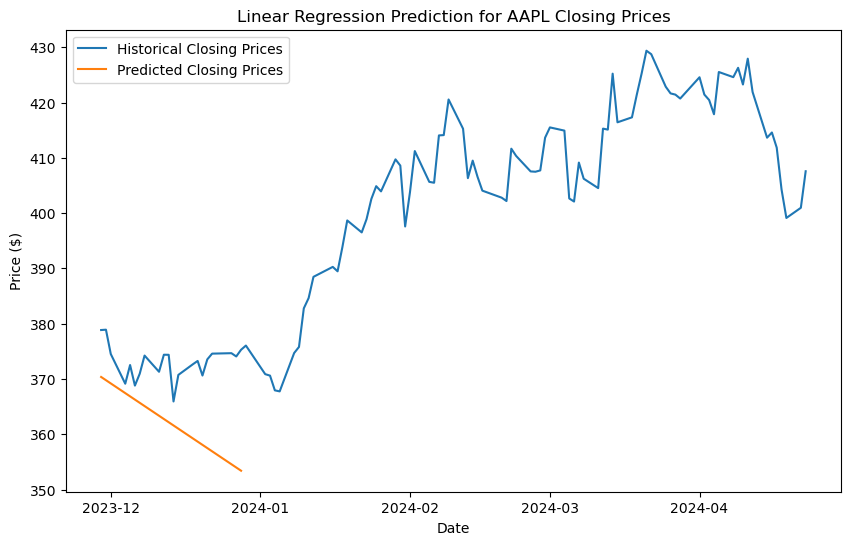

In [29]:
from sklearn.linear_model import LinearRegression

# Regression Analysis - Perform linear regression for AAPL closing prices
X = np.arange(len(aapl_data)).reshape(-1, 1)
y = aapl_data['4. close'].values

model = LinearRegression()
model.fit(X, y)

future_dates = pd.date_range(start=aapl_data['date'].iloc[-1], periods=30)
future_X = np.arange(len(aapl_data), len(aapl_data) + 30).reshape(-1, 1)
future_prices = model.predict(future_X)

plt.figure(figsize=(10, 6))
plt.plot(aapl_data['date'], aapl_data['4. close'], label='Historical Closing Prices')
plt.plot(future_dates, future_prices, label='Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Linear Regression Prediction for AAPL Closing Prices')
plt.legend()
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_7896\3996862117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googl_data['50-day MA'] = googl_data['4. close'].rolling(window=50).mean()


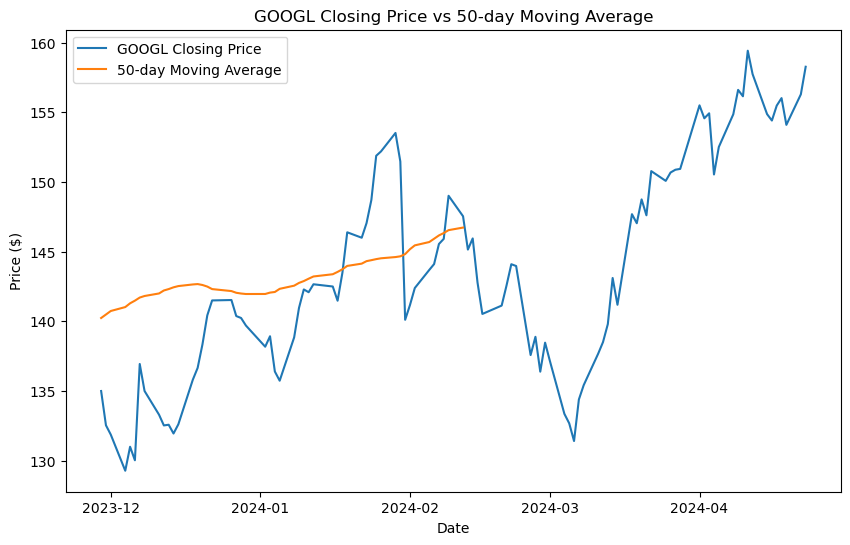

In [23]:
googl_data['50-day MA'] = googl_data['4. close'].rolling(window=50).mean()
plt.figure(figsize=(10, 6))
plt.plot(googl_data['date'], googl_data['4. close'], label='GOOGL Closing Price')
plt.plot(googl_data['date'], googl_data['50-day MA'], label='50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('GOOGL Closing Price vs 50-day Moving Average')
plt.legend()
plt.show()

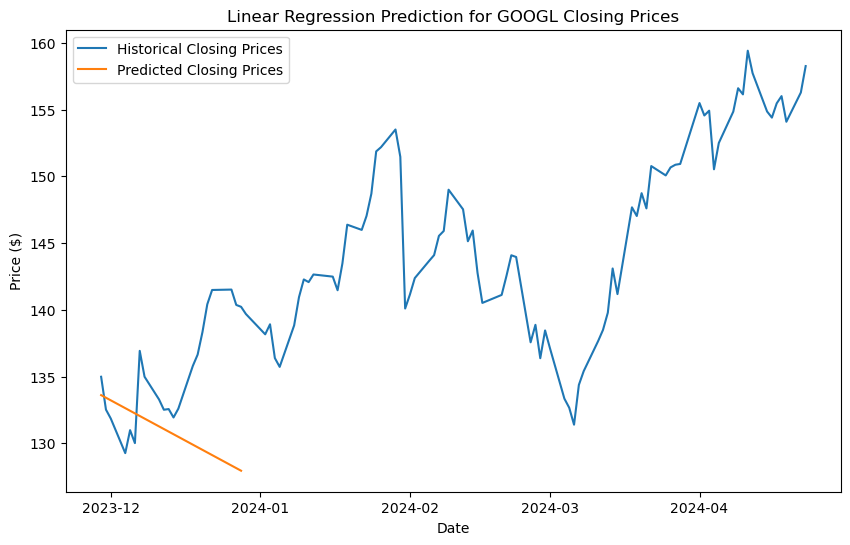

In [30]:
# Regression Analysis - Perform linear regression for GOOGL closing prices
X = np.arange(len(googl_data)).reshape(-1, 1)
y = googl_data['4. close'].values

model = LinearRegression()
model.fit(X, y)

future_dates = pd.date_range(start=googl_data['date'].iloc[-1], periods=30)
future_X = np.arange(len(googl_data), len(googl_data) + 30).reshape(-1, 1)
future_prices = model.predict(future_X)

plt.figure(figsize=(10, 6))
plt.plot(googl_data['date'], googl_data['4. close'], label='Historical Closing Prices')
plt.plot(future_dates, future_prices, label='Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Linear Regression Prediction for GOOGL Closing Prices')
plt.legend()
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_7896\1476645689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_data['50-day MA'] = msft_data['4. close'].rolling(window=50).mean()


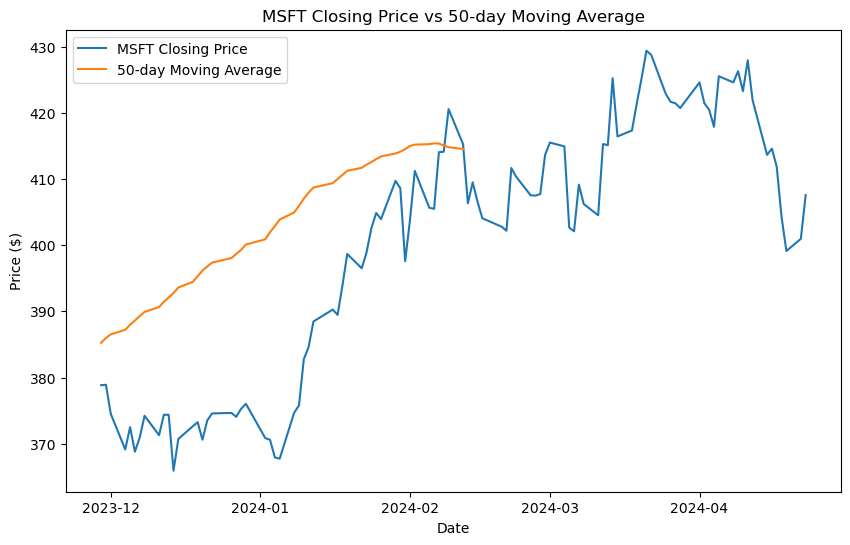

In [24]:
msft_data['50-day MA'] = msft_data['4. close'].rolling(window=50).mean()
plt.figure(figsize=(10, 6))
plt.plot(msft_data['date'], msft_data['4. close'], label='MSFT Closing Price')
plt.plot(msft_data['date'], msft_data['50-day MA'], label='50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('MSFT Closing Price vs 50-day Moving Average')
plt.legend()
plt.show()

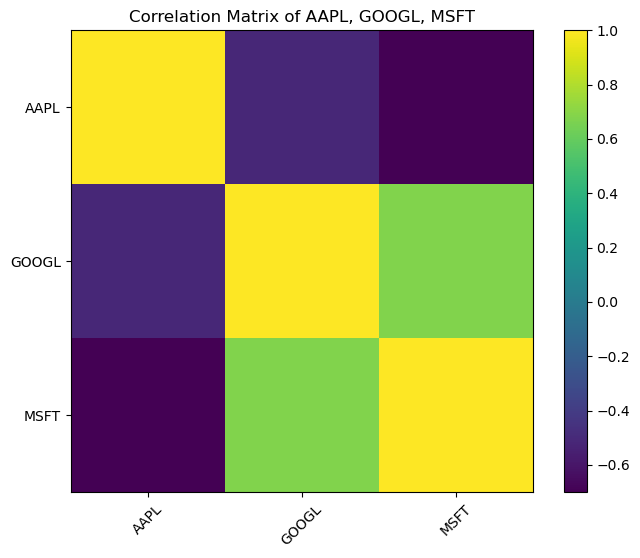

In [25]:
# Correlation Analysis between AAPL, GOOGL, and MSFT
corr_matrix = df_stocks1.pivot(index='date', columns='symbol', values='4. close').corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of AAPL, GOOGL, MSFT')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

In [32]:
merged_data = pd.merge(df_stocks1, df_fx1, on='date', how='inner')
merged_data

print("Merged Data:")
merged_data.to_csv('merged_data.csv')
merged_data.head()

Merged Data:


,symbol,date,1. open_x,2. high_x,3. low_x,4. close_x,5. volume,daily_return,currencyPair,1. open_y,2. high_y,3. low_y,4. close_y
0,AAPL,2024-04-23,165.26,167.05,164.93,166.90,49298369.0,NaN,EURUSD,1.06543,1.07113,1.06380,1.07007
1,AAPL,2024-04-23,165.26,167.05,164.93,166.90,49298369.0,NaN,USDJPY,154.80400,154.87500,154.55000,154.80000
2,AAPL,2024-04-23,165.26,167.05,164.93,166.90,49298369.0,NaN,GBPUSD,1.23492,1.24585,1.23315,1.24492
3,MSFT,2024-04-23,404.02,408.20,403.06,407.57,15634563.0,115.224164,EURUSD,1.06543,1.07113,1.06380,1.07007
4,MSFT,2024-04-23,404.02,408.20,403.06,407.57,15634563.0,115.224164,USDJPY,154.80400,154.87500,154.55000,154.80000


In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   symbol        801 non-null    object        
 1   date          801 non-null    datetime64[ns]
 2   1. open_x     801 non-null    float64       
 3   2. high_x     801 non-null    float64       
 4   3. low_x      801 non-null    float64       
 5   4. close_x    801 non-null    float64       
 6   5. volume     801 non-null    float64       
 7   currencyPair  801 non-null    object        
 8   1. open_y     801 non-null    float64       
 9   2. high_y     801 non-null    float64       
 10  3. low_y      801 non-null    float64       
 11  4. close_y    801 non-null    float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 75.2+ KB


In [25]:
merged_data.describe()

,date,1. open_x,2. high_x,3. low_x,4. close_x,5. volume,1. open_y,2. high_y,3. low_y,4. close_y
count,801,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000
mean,2024-02-12 12:02:41.797752832,242.166941,244.060926,240.169463,242.219563,3.716843e+07,53.492515,53.690320,53.275887,53.521016
min,2023-12-04 00:00:00,128.950000,130.030000,127.900000,129.270000,1.246871e+07,1.061640,1.065350,1.060100,1.061460
25%,2024-01-09 00:00:00,149.940000,151.580000,148.900000,150.530000,2.176313e+07,1.088780,1.093120,1.086580,1.088690
50%,2024-02-13 00:00:00,182.510000,184.850000,181.350000,183.630000,2.903283e+07,1.266140,1.270180,1.262470,1.266190
75%,2024-03-19 00:00:00,376.020000,377.636100,374.160000,376.040000,4.910718e+07,147.057000,147.390000,146.237000,147.030000
max,2024-04-22 00:00:00,429.830000,430.820000,427.160000,429.370000,1.366826e+08,154.650000,154.849000,154.582000,154.832000
std,NaN,114.127425,114.739783,113.179250,114.010331,2.072508e+07,70.482624,70.742281,70.199567,70.522289


In [26]:
merged_data.shape

(801, 12)

In [27]:
merged_data.isnull().sum()

symbol          0
date            0
1. open_x       0
2. high_x       0
3. low_x        0
4. close_x      0
5. volume       0
currencyPair    0
1. open_y       0
2. high_y       0
3. low_y        0
4. close_y      0
dtype: int64

            4. close_x  4. close_y
4. close_x      1.0000      0.0011
4. close_y      0.0011      1.0000


<Axes: >

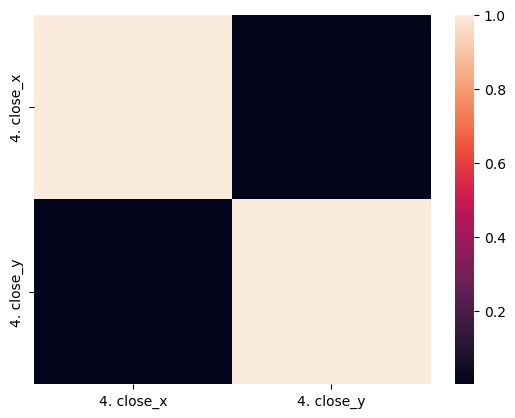

In [38]:
# Calculate correlation matrix
correlation_matrix = merged_data[['4. close_x', '4. close_y']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix)

In [33]:
# Correlation analysis
correlation = merged_data['4. close_x'].corr(merged_data['4. close_y'])
print(f'Correlation between AAPL closing price and EURUSD exchange rate: {correlation:.2f}')

# Regression analysis (example using numpy polyfit)
x = merged_data['4. close_y']  # Independent variable (EURUSD closing rate)
y = merged_data['4. close_x']  # Dependent variable (AAPL closing price)
coefficients = np.polyfit(x, y, 1)  # Linear regression
print(f'Regression coefficients: {coefficients}')


Correlation between AAPL closing price and EURUSD exchange rate: 0.00
Regression coefficients: [1.77883545e-03 2.42124358e+02]


In [34]:
# T-test example (comparing two groups)
group1 = df_stocks1[df_stocks1['date'] < '2024-04-01']['4. close']
group2 = df_stocks1[df_stocks1['date'] >= '2024-04-01']['4. close']
t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test results - t-statistic: {t_stat}, p-value: {p_value}')

T-test results - t-statistic: -0.36834962128979604, p-value: 0.7128740823572618
